<a href="https://colab.research.google.com/github/Abhyuday19/Python_Repo/blob/main/Sentiment_Analysis_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Amazon Alexa Review Sentiment Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
Stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

Exploratory Data Analysis

In [ ]:
# Load the Data
data = pd.read_csv('amazon_alexa.tsv', delimiter ='\t' , quoting =3)
print(f"DataSet Shape: {data.shape}")


DataSet Shape: (3150, 5)


In [ ]:
data.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# Checking the column names
print(f"features names: {data.columns.values}")

features names: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [ ]:
# Checking for the null values
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [ ]:
# Dropping the null value record
data.dropna(inplace=True)

In [ ]:
print(f"Dataset after removing the null value is {data.shape}")

Dataset after removing the null value is (3149, 5)


In [ ]:
# Creating the new column just to know the length of the string in 'verified_reviews' coolumn

data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
data.tail()

,rating,date,variation,verified_reviews,feedback,length
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1,52
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1,137
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1,443
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1,382
3149,4,29-Jul-18,Black Dot,Good,1,4


In [ ]:
data.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64


Analyzing the rating column

In [ ]:
# Distinct Value of rating and its count
print(f'Rating value Count: \n{data["rating"].value_counts()}')

Rating value Count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


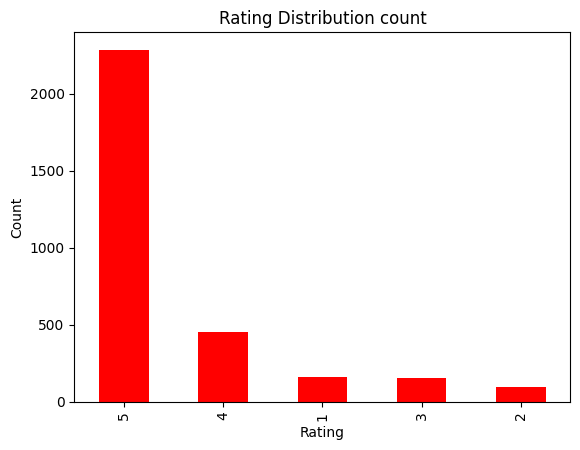

In [ ]:
# Bar plot to visualize the total counts of the each rating
data['rating'].value_counts().plot.bar(color ='red')
plt.title('Rating Distribution count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Finding the percentage distribution of each rating - we will divide the number of the records for each rating by the total number of the records
print(f"Rating value count - percentage distribution :\n {round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution :
 rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


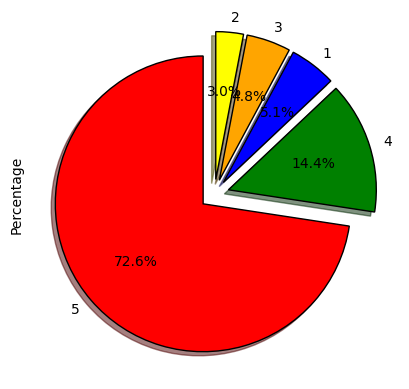

In [ ]:
# Now lets plot the above values in pie chart
fig = ('red', 'green' , 'blue', 'orange', 'yellow')
wp ={'linewidth':1 , "edgecolor" : 'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode = (0.1, 0.1,0.1, 0.1, 0.1)
ax =tags.plot(kind='pie', autopct="%1.1f%%", shadow = True, colors = fig , startangle =90, wedgeprops =wp , explode = explode, label ='Percentage')

from io import BytesIO
graph = BytesIO()
fig = ax.figure
fig.savefig(graph , format = 'png')

Analyzing the FeedBack Column

In [ ]:
# This Feedback column refers to the feedback of the verified reviews

In [ ]:
print(f'Feedback value Count: \n{data["feedback"].value_counts()}') # here  feedback with 1 - Represents the Positive Feedback , feedback with 0 - Represents the Negative Feedback.

Feedback value Count: 
feedback
1    2893
0     256
Name: count, dtype: int64


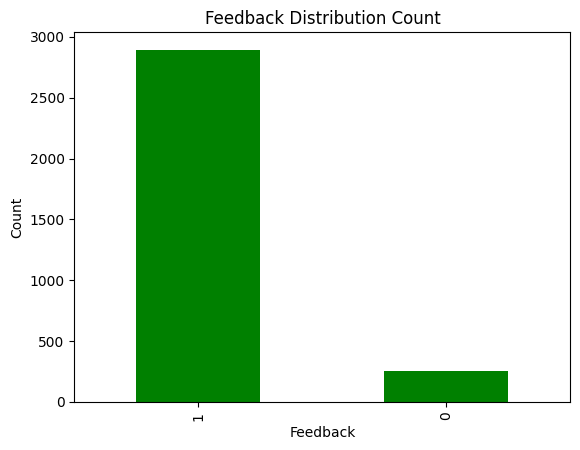

In [ ]:
# Bar Graph to Visualize the Total Counts of each Feedback
data_1 = data['feedback'].value_counts().plot.bar(color = 'green')
plt.title('Feedback Distribution Count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

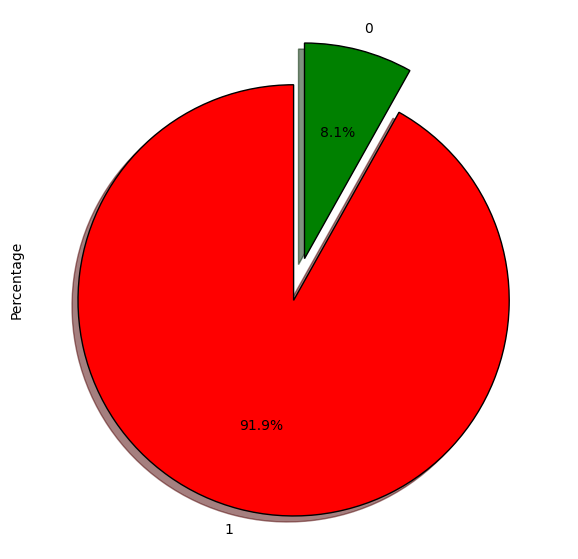

In [ ]:
# Now lets plot the above values in pie chart
fig = plt.figure(figsize=(7,7))
colors = ['red', 'green']

wp ={'linewidth':1 , "edgecolor" : 'black'}
tags = data['feedback'].value_counts()/data.shape[0]
explode = (0.1, 0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow = True, colors = colors , startangle =90, wedgeprops =wp , explode = explode, label ='Percentage')
plt.show()

In [ ]:
## Looking at the 'rating' values for the different values of the 'feedback'
## If the rating is '1' or '2' then it means the feedback is '0' , and if the rating is either '3', '4', '5', then it means the Feedback is '1'

In [ ]:
# Feedback = 0
data[data['feedback'] == 0 ] ['rating'].value_counts()

,count
rating,
1,161
2,95


In [ ]:
# FeedBack = 1
data[data['feedback']==1] ['rating'].value_counts()

,count
rating,
5,2286
4,455
3,152


## Analyzing the 'Variation' Column

In [ ]:
## This column refers to the variation of type of Amazon Alexa product Example - Back Dot , Charcoal Fabric etc.

In [ ]:
# Distinct Values of the 'Variations' and it's Count

print(f"Variation Value Count: \n{data['variation'].value_counts()}")

Variation Value Count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


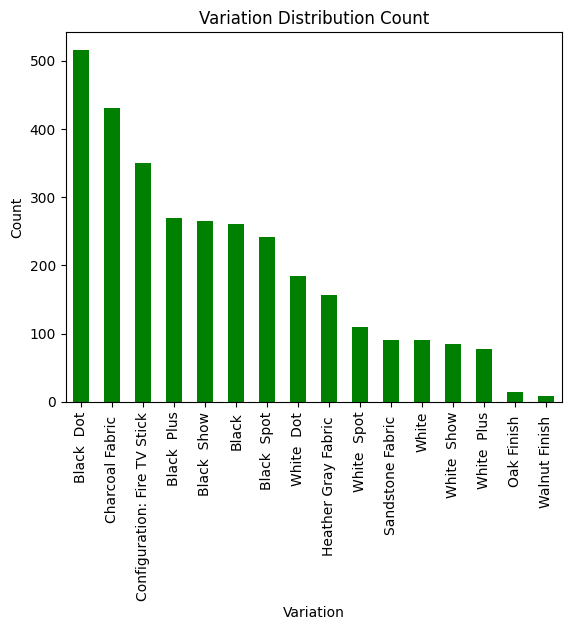

In [ ]:
# Bar Representation of the Above Data(Variations)
data['variation'].value_counts().plot.bar(color = 'green')
plt.title('Variation Distribution Count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
# Finding the Percentage distribution of each variation - we will divide the number of records . for each variation by total number of the records
print(f"Variation value count - percentage distribution : \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution : 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [ ]:
# Mean rating According to the Variation
data.groupby('variation')['rating'].mean()

,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


Lets Analyze the above Rating

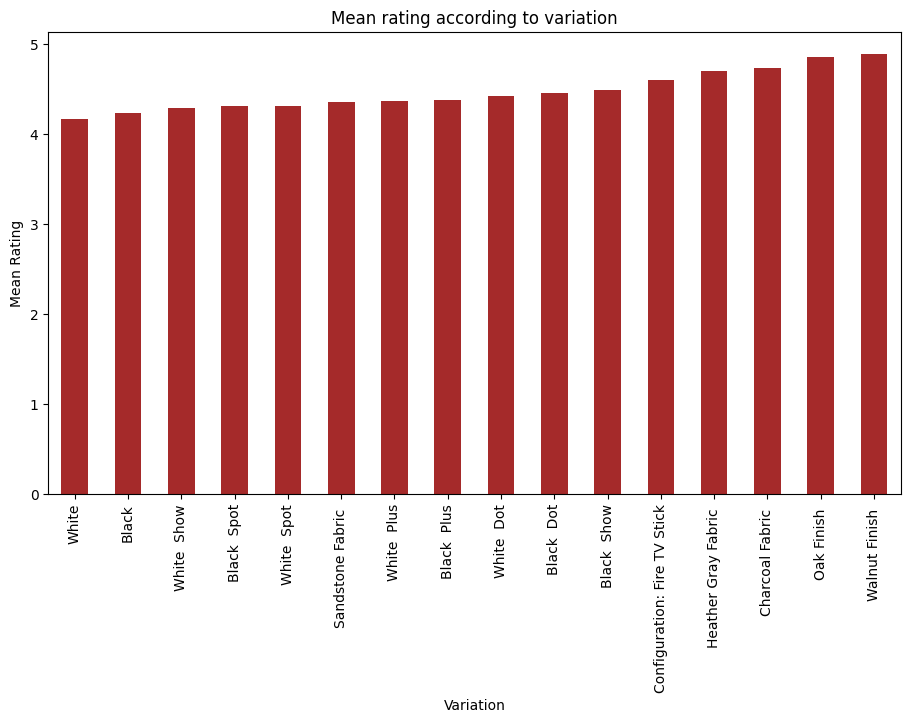

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='brown', figsize=(11,6))
plt.title("Mean rating according to variation")
plt.xlabel("Variation")
plt.ylabel("Mean Rating")
plt.show()

Analyzing the 'Verified_reviews' column

In [ ]:
data['length'].describe()

,length
count,3149.000000
mean,132.714513
std,182.541531
min,1.000000
25%,30.000000
50%,74.000000
75%,166.000000
max,2853.000000


[Text(0.5, 1.0, 'Distribution of the length of the Reviews')]

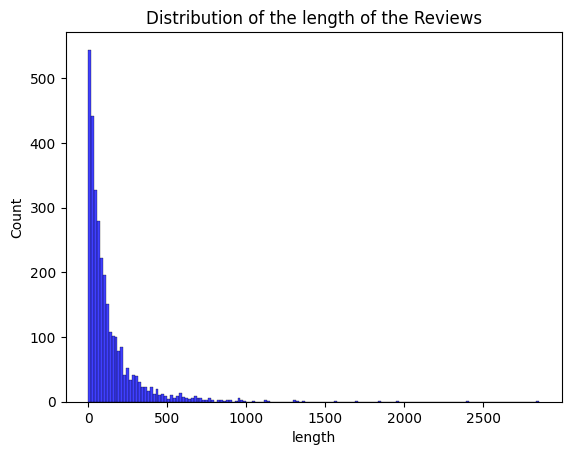

In [ ]:
## Here Using the Seaborn Library for the Graph Distribution
sns.histplot(data['length'], color='blue').set(title='Distribution of the length of the Reviews')

[Text(0.5, 1.0, 'Distribution of the Length of the reviews if the feedback =0')]

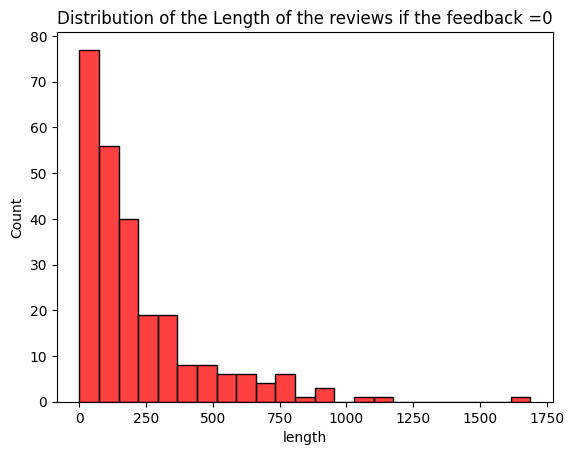

In [ ]:
# Length analysis when feedback is 0 (Negative)
sns.histplot(data[data['feedback']==0]['length'], color='red').set(title = 'Distribution of the Length of the reviews if the feedback =0')

[Text(0.5, 1.0, 'Distribution of the reviews when the Feedback is = 1 ')]

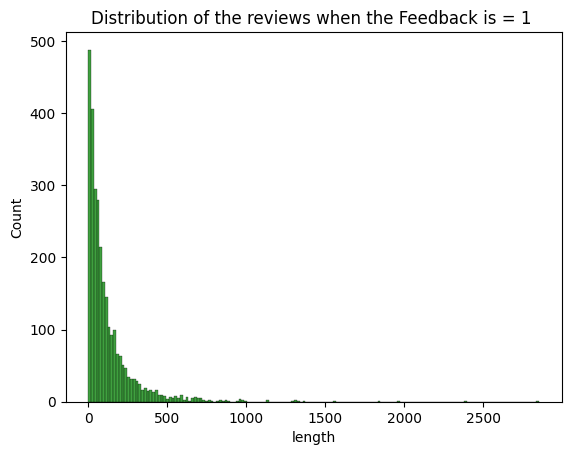

In [ ]:
## Here is the Analysis when the Feedback is = 1
sns.histplot(data[data['feedback'] ==1] ['length'], color = 'green').set(title= 'Distribution of the reviews when the Feedback is = 1 ')

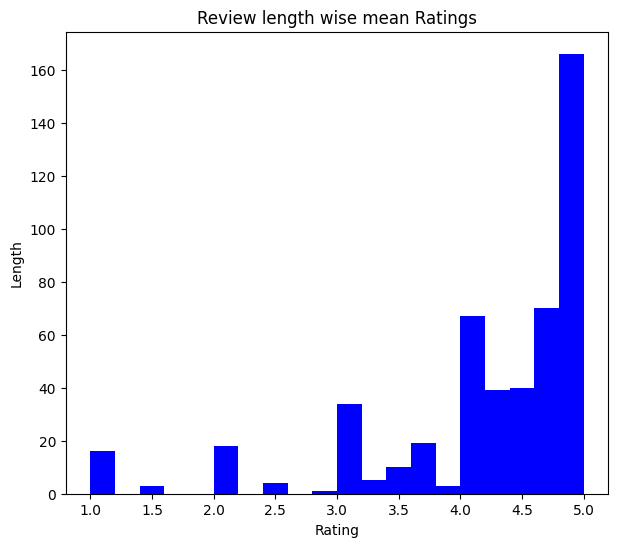

In [ ]:
# Lengthwise Mean Rating
data.groupby('length')['rating'].mean().plot.hist(color = 'blue' , figsize=(7,6),bins=20)
plt.title('Review length wise mean Ratings')
plt.xlabel('Rating')
plt.ylabel('Length')
plt.show()

In [ ]:
cv = CountVectorizer(stop_words ='english') # Here we are converting the Textual Data into Vector Representattions.
words = cv.fit_transform(data.verified_reviews) # Here we are calling the cv and fitting it in the ContVectorizer Model.

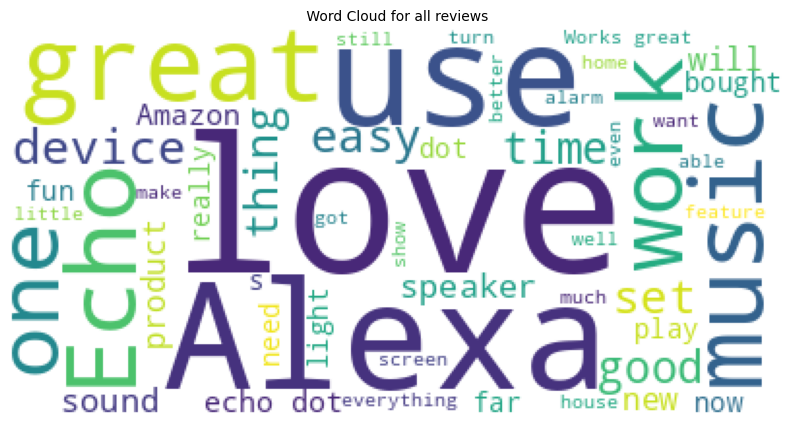

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

# Initialize Word Cloud object
wc = WordCloud(background_color ='white', max_words = 50)

# Generate and plot WordCloud
plt.figure(figsize = (10,10))
plt.imshow(wc.generate(reviews))
plt.title(" Word Cloud for all reviews " , fontsize = 10)
plt.axis('off')
plt.show()

Lets find the unique words in the 'verified_reviews'

In [ ]:
# Combining all the reviews for each feedback category and Splitting them into individuals words
neg_reviews = " ".join([review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()


pos_reviews = " ".join([review for review in data[data['feedback']==1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()


# Finding words from reviews which are present in that feedback category only

unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive =[x for x in pos_reviews if x not in pos_reviews]
unique_positive = " ".join(unique_positive)

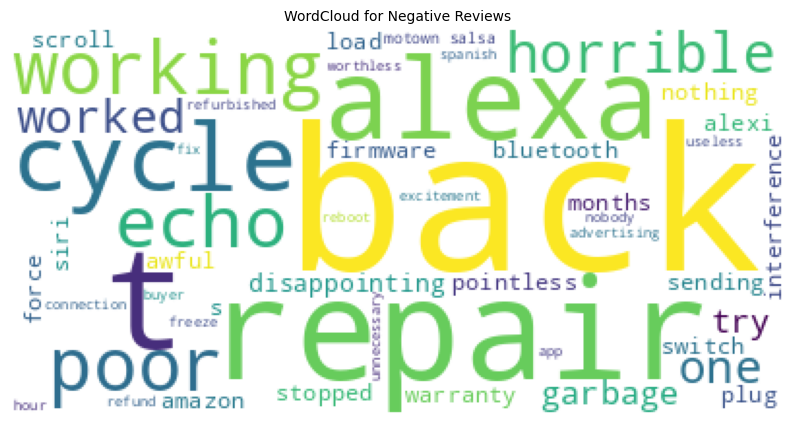

In [ ]:
wc = WordCloud(background_color='white', max_words = 50)

# Generate and plot Wordcloud

plt.figure(figsize =(10, 10))
plt.imshow(wc.generate(unique_negative))
plt.title('WordCloud for Negative Reviews' , fontsize = 10)
plt.axis('off')
plt.show()

## Preprocessing and Modelling

 To build the corpus from the "verified_reviews" we perform the following
1. Replace any non alphabet charaters with a space
2. Convert to the lowercase and split
3. iterate over the individual words and if it is not a stopword then add the stemmed form of word to the corpus

In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]' , ' ' , data.iloc[i]["verified_reviews"])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in 'Stop_words']
  review = ' '.join(review)
  corpus.append(review)

 Using the Count Vectorize to create bag of words

In [ ]:
import os
import pickle
from sklearn.feature_extraction.text import CountVectorizer


model_dir = 'Models'
# Storing independent and dependent Variables in X and y
if not os.path.exists(model_dir):
  os.makedirs(model_dir)

cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
# Saving the Count Vectorizer
pickle.dump(cv , open(os.path.join(model_dir, 'countVectorizer.pkl'), 'wb'))

In [ ]:
# Checking the Shape of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (3149, 2500)
Shape of y: (3149,)


Splitting data into train and test set with 30% with testing

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state =15)
print(f"X Train: {X_train.shape}")
print(f"X test : {X_test.shape}")
print(f"y train : {y_train.shape}")
print(f"y test : {y_test.shape}")

X Train: (2204, 2500)
X test : (945, 2500)
y train : (2204,)
y test : (945,)


In [ ]:
print(f"X_train max value: {X_train.max()}")
print(f"X_test max value : {X_test.max()}")

X_train max value: 31
X_test max value : 23


We will train X_train and X_test so that all the values are between 0 and 1

In [ ]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
# Saving the Scaler Model
pickle.dump(scaler, open(os.path.join(model_dir, 'scaler.pkl'), 'wb'))

## Random Forest Classifier

In [ ]:
# Fitting the X_train , y_train on the random forest classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl , y_train)

RandomForestClassifier()

In [ ]:
# Acurray of the model on training and testing data
print("Training Accuracy ",model_rf.score(X_train_scl, y_train))
print("Testing Accuracy " , model_rf.score(X_test_scl , y_test))

Training Accuracy  0.9954627949183303
Testing Accuracy  0.9407407407407408


In [ ]:
# Predicting on test set
y_pred = model_rf.predict(X_test_scl)

In [ ]:
# Confusion metrix
cm = confusion_matrix(y_test , y_pred)

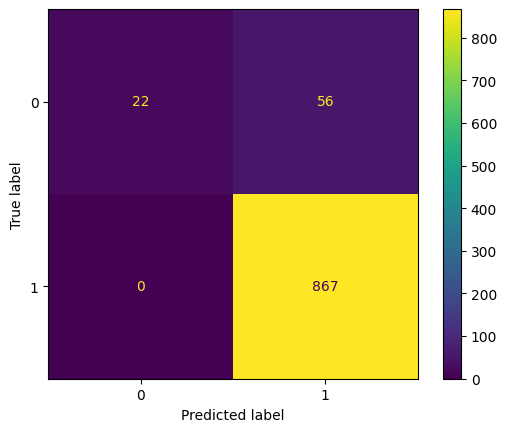

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

K-fold cross validation

In [ ]:
accuracies = cross_val_score(estimator = model_rf , X = X_train_scl , y= y_train , cv = 10)

print("Accuracy :" , accuracies.mean())
print("Standard Variance :" , accuracies.std())

Accuracy : 0.9301336898395723
Standard Variance : 0.0064102425151503755


Applying Grid Search to get the optimal parameter for the random forest

In [ ]:
params ={
    'bootstrap' : [True],
    'max_depth' : [80, 100],
    'min_samples_split': [8,12],
    'n_estimators' :[100,300]
}

In [ ]:
cv_object = StratifiedKFold(n_splits=2)
grid_search = GridSearchCV(estimator = model_rf , param_grid = params , cv = cv_object , verbose = 0 , return_train_score = True )
grid_search.fit(X_train_scl , y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

Getting the best parameters from the grid search

In [ ]:
print("Best parameter Combination : {}".format(grid_search.best_params_))

Best parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
# Get the results from the cv_results_
cv_results = grid_search.cv_results_

In [ ]:
print("Cross validation mean acurracy on train set : {}".format(cv_results['mean_train_score'].mean()*100))
print("Cross validation mean acurracy on test set : {}".format(cv_results['mean_test_score'].mean()*100))
print("Accuracy Score for the test set :" , accuracy_score(y_test ,y_pred))

Cross validation mean acurracy on train set : 96.75589836660617
Cross validation mean acurracy on test set : 92.1166061705989
Accuracy Score for the test set : 0.9407407407407408


XgBoost Algorithm

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Accuracy of the model on training and testing data
print("Training Acurracy : ", model_xgb.score(X_train_scl ,y_train))
print("Testing Accuracy : ", model_xgb.score(X_test_scl , y_test))

Training Acurracy :  0.984573502722323
Testing Accuracy :  0.9502645502645503


In [ ]:
y_preds = model_xgb.predict(X_test)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test , y_preds)
print(cm)

[[ 39  39]
 [  9 858]]


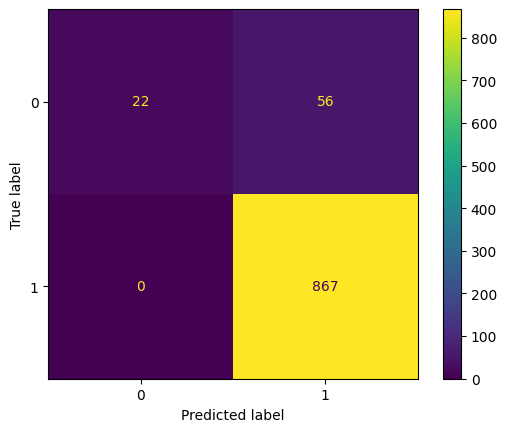

In [ ]:
cm_dispaly = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
# Saving the XgBoost Classifier
pickle.dump(scaler, open(os.path.join(model_dir, 'xgb.pkl'), 'wb'))

Decison Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl , y_train)

DecisionTreeClassifier()

In [ ]:
# Accuracy of the model based on the training and test data
print("Trainning Accuracy : ", model_dt.score(X_train_scl , y_train)) # here there is the overfitting Porblem as there is the differnce between the tarinning and testing Accuracy
print("Testing Accuracy: " , model_dt.score(X_test_scl , y_test))

Trainning Accuracy :  0.9954627949183303
Testing Accuracy:  0.9195767195767196


In [ ]:
y_preds = model_dt.predict(X_test)

In [70]:
y_preds = model_xgb.predict(X_test)

In [71]:
# Confusion Matrix
cm = confusion_matrix(y_test , y_preds)
print(cm)

[[ 39  39]
 [  9 858]]


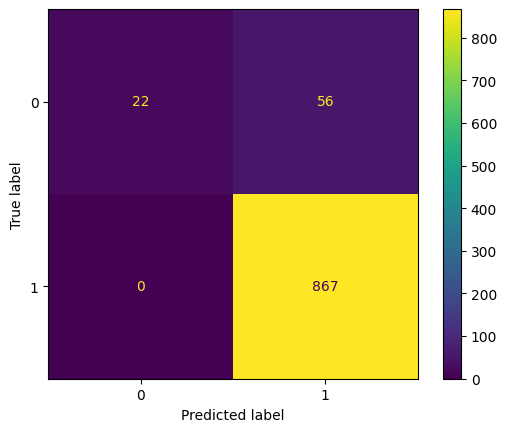

In [72]:
cm_disply = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()